In [2]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [3]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/"

In [4]:
indir_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/Monte_Carlo_all_events_all_variables.csv"
indir_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/Burnsample_1_percent_all_events_all_variables.csv"
RD = pd.read_csv(indir_RD).sort_values('event_no').reset_index(drop = True)
MC = pd.read_csv(indir_MC).sort_values('event_no').reset_index(drop = True)

In [5]:
indir_retro = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Retro/retro_on_new_muon_test_set_2.csv"
retro = pd.read_csv(indir_retro).sort_values('event_no').reset_index(drop = True)

In [6]:
retro.columns

Index(['L7_oscNext_bool', 'EventID', 'RunID', 'SubEventID', 'SubrunID',
       'L4_MuonClassifier_Data_ProbNu', 'L4_NoiseClassifier_ProbNu',
       'L7_MuonClassifier_FullSky_ProbNu',
       'L7_PIDClassifier_FullSky_ProbTrack', 'azimuth_retro', 'azimuth_sigma',
       'cascade_energy_retro', 'energy_retro', 'energy_sigma', 'osc_weight',
       'position_x_retro', 'position_x_sigma', 'position_y_retro',
       'position_y_sigma', 'position_z_retro', 'position_z_sigma',
       'time_retro', 'time_sigma', 'track_energy_retro', 'track_length_retro',
       'zenith_retro', 'zenith_sigma', 'event_no'],
      dtype='object')

In [7]:
neutrino_cut = 12
pure_selection_MC_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-12,12,-14,14,-16,16)))]
pure_selection_MC_electron_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-12,12)))]
pure_selection_MC_muon_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-14,14)))]
pure_selection_MC_tau_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-16,16)))]
pure_selection_MC_noise = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-1,1)))]
pure_selection_MC_muons = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-13,13)))]
pure_selection_RD = RD['event_no'][RD['pid_neutrino_pred_logit']>neutrino_cut]

In [8]:
print('this is the number of muons surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the number of noise surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the number of neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the number of electron neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the number of muon neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the number of tau neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the rate of muons surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the rate of noise surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the rate of neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the rate of electron neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the rate of muon neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the rate of tau neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the RD rate that survives:',np.sum(RD['total_osc_weight'][RD['event_no'].isin(pure_selection_RD.to_list())]))

this is the number of muons surviving 4
this is the number of noise surviving 0
this is the number of neutrinos surviving 12669619
this is the number of electron neutrinos surviving 2923503
this is the number of muon neutrinos surviving 6517475
this is the number of tau neutrinos surviving 3228641
this is the rate of muons surviving 6.682139306877526e-05
this is the rate of noise surviving 0.0
this is the rate of neutrinos surviving 0.0028259760380168557
this is the rate of electron neutrinos surviving 0.0005733016923178883
this is the rate of muon neutrinos surviving 0.002140844420342449
this is the rate of tau neutrinos surviving 0.0001118299253565169
this is the RD rate that survives: 0.00577558948025145


In [9]:
MC = MC[MC['L3_oscNext_bool'] == 1]
RD = RD[RD['L3_oscNext_bool'] == 1]

print('THIS IS AFTER LVL3 filter')
print('this is the number of muons surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the number of noise surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the number of neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the number of electron neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the number of muon neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the number of tau neutrinos surviving',len(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the rate of muons surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the rate of noise surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the rate of neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the rate of electron neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the rate of muon neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the rate of tau neutrinos surviving',np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the RD rate that survives:',np.sum(RD['total_osc_weight'][RD['event_no'].isin(pure_selection_RD.to_list())]))

THIS IS AFTER LVL3 filter
this is the number of muons surviving 3
this is the number of noise surviving 0
this is the number of neutrinos surviving 9609601
this is the number of electron neutrinos surviving 2236525
this is the number of muon neutrinos surviving 4946044
this is the number of tau neutrinos surviving 2427032
this is the rate of muons surviving 5.238606097941867e-05
this is the rate of noise surviving 0.0
this is the rate of neutrinos surviving 0.002224562395705728
this is the rate of electron neutrinos surviving 0.00047581403222368907
this is the rate of muon neutrinos surviving 0.0016521866209122063
this is the rate of tau neutrinos surviving 9.656174256983517e-05
this is the RD rate that survives: 0.002773715281501204


In [10]:
muon_final_rate = np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muons.to_list())])
noise_final_rate = np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_noise.to_list())])
neutrinos_final_rate = np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())])
electron_neutrinos_final_rate = np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())])
muon_neutrinos_final_rate = np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())])
tau_neutrinos_final_rate = np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())])
total_final_rate = neutrinos_final_rate + muon_final_rate + noise_final_rate

print('this is the total final rate:',total_final_rate)
print('this is the percent of muons surviving',muon_final_rate/total_final_rate*100)
print('this is the percent of noise surviving',noise_final_rate/total_final_rate*100)
print('this is the percent of neutrinos surviving',neutrinos_final_rate/total_final_rate*100)
print('this is the percent of electron neutrinos surviving',electron_neutrinos_final_rate/total_final_rate*100)
print('this is the percent of muon neutrinos surviving',muon_neutrinos_final_rate/total_final_rate*100)
print('this is the percent of tau neutrinos surviving',tau_neutrinos_final_rate/total_final_rate*100)


this is the total final rate: 0.0022769484566851467
this is the percent of muons surviving 2.300713519693983
this is the percent of noise surviving 0.0
this is the percent of neutrinos surviving 97.69928648030601
this is the percent of electron neutrinos surviving 20.897004972892276
this is the percent of muon neutrinos surviving 72.56144143541623
this is the percent of tau neutrinos surviving 4.240840071997624


In [ ]:
MC_up = MC[MC['zenith_pred']>np.pi/2]
RD_up = RD[RD['zenith_pred']>np.pi/2]
noise_rates_up = []
muon_rates_up = []
neutrino_rates_up = []
electron_neutrino_rates_up = []
muon_neutrino_rates_up = []
tau_neutrino_rates_up = []
RD_rates_up = []

cuts = np.linspace(-17,16,34)
for i in range(len(cuts)):
    neutrino_cut = cuts[i]
    pure_selection_MC_neutrinos = MC_up['event_no'][(MC_up['pid_neutrino_pred_logit']>neutrino_cut) & (MC_up['pid'].isin((-12,12,-14,14,-16,16)))]
    pure_selection_MC_electron_neutrinos = MC_up['event_no'][(MC_up['pid_neutrino_pred_logit']>neutrino_cut) & (MC_up['pid'].isin((-12,12)))]
    pure_selection_MC_muon_neutrinos = MC_up['event_no'][(MC_up['pid_neutrino_pred_logit']>neutrino_cut) & (MC_up['pid'].isin((-14,14)))]
    pure_selection_MC_tau_neutrinos = MC_up['event_no'][(MC_up['pid_neutrino_pred_logit']>neutrino_cut) & (MC_up['pid'].isin((-16,16)))]
    pure_selection_MC_noise = MC_up['event_no'][(MC_up['pid_neutrino_pred_logit']>neutrino_cut) & (MC_up['pid'].isin((-1,1)))]
    pure_selection_MC_muons = MC_up['event_no'][(MC_up['pid_neutrino_pred_logit']>neutrino_cut) & (MC_up['pid'].isin((-13,13)))]
    pure_selection_RD = RD_up['event_no'][RD_up['pid_neutrino_pred_logit']>neutrino_cut]

    muon_rates_up.append(np.sum(MC_up['total_osc_weight'][MC_up['event_no'].isin(pure_selection_MC_muons.to_list())]))
    noise_rates_up.append(np.sum(MC_up['total_osc_weight'][MC_up['event_no'].isin(pure_selection_MC_noise.to_list())]))
    neutrino_rates_up.append(np.sum(MC_up['total_osc_weight'][MC_up['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
    electron_neutrino_rates_up.append(np.sum(MC_up['total_osc_weight'][MC_up['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
    muon_neutrino_rates_up.append(np.sum(MC_up['total_osc_weight'][MC_up['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
    tau_neutrino_rates_up.append(np.sum(MC_up['total_osc_weight'][MC_up['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))
    RD_rates_up.append(np.sum(RD_up['total_osc_weight'][RD_up['event_no'].isin(pure_selection_RD.to_list())]))

    

In [ ]:
noise_rates_up = np.array(noise_rates_up)*0.1630206
muon_rates_up = np.array(muon_rates_up)*2.78957804
neutrino_rates_up = np.array(neutrino_rates_up)*1.06090328
electron_neutrino_rates_up = np.array(electron_neutrino_rates_up)*1.06090328
muon_neutrino_rates_up = np.array(muon_neutrino_rates_up)*1.06090328
tau_neutrino_rates_up = np.array(tau_neutrino_rates_up)*1.06090328


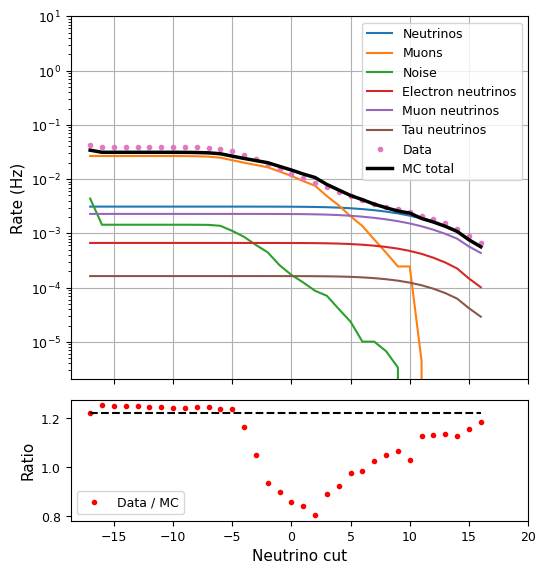

In [ ]:
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.85
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])


axs[0].plot(cuts,neutrino_rates_up,label='Neutrinos',)
axs[0].plot(cuts,muon_rates_up,label='Muons')
axs[0].plot(cuts,noise_rates_up,label='Noise')
axs[0].plot(cuts,electron_neutrino_rates_up,label='Electron neutrinos')
axs[0].plot(cuts,muon_neutrino_rates_up,label='Muon neutrinos')
axs[0].plot(cuts,tau_neutrino_rates_up,label='Tau neutrinos')
axs[0].plot(cuts,RD_rates_up,'.',label='Data',linewidth=2.5)#,linestyle='dashed')
axs[0].plot(cuts,np.array(neutrino_rates_up)+np.array(muon_rates_up)+np.array(noise_rates_up),label='MC total',color='k',linewidth=2.5)
axs[0].set_ylabel('Rate (Hz)')
axs[1].set_xlabel('Neutrino cut')
axs[0].set_yscale('log')
axs[0].set_xlim(right=20)
axs[0].set_ylim(top=10)
axs[0].legend()
axs[0].grid(True)

RD_MC_ratio = RD_rates_up/(np.array(neutrino_rates_up)+np.array(muon_rates_up)+np.array(noise_rates_up))
axs[1].set_ylabel('Ratio')
axs[1].plot(cuts,RD_MC_ratio,'.',color='red',label='Data / MC')
axs[1].hlines(RD_MC_ratio[0],np.min(cuts)-0.02,np.max(cuts)+0.02,color='k',linestyles='dashed')
axs[1].legend()
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/"
fig.savefig(outdir+ 'MC_vs_retro_selection_only_upgoing.png', format='png', bbox_inches='tight')

In [ ]:
MC_down = MC[MC['zenith_pred']<np.pi/2]
RD_down = RD[RD['zenith_pred']<np.pi/2]
noise_rates_down = []
muon_rates_down = []
neutrino_rates_down = []
electron_neutrino_rates_down = []
muon_neutrino_rates_down = []
tau_neutrino_rates_down = []
RD_rates_down = []

cuts = np.linspace(-17,16,34)
for i in range(len(cuts)):
    neutrino_cut = cuts[i]
    pure_selection_MC_neutrinos = MC_down['event_no'][(MC_down['pid_neutrino_pred_logit']>neutrino_cut) & (MC_down['pid'].isin((-12,12,-14,14,-16,16)))]
    pure_selection_MC_electron_neutrinos = MC_down['event_no'][(MC_down['pid_neutrino_pred_logit']>neutrino_cut) & (MC_down['pid'].isin((-12,12)))]
    pure_selection_MC_muon_neutrinos = MC_down['event_no'][(MC_down['pid_neutrino_pred_logit']>neutrino_cut) & (MC_down['pid'].isin((-14,14)))]
    pure_selection_MC_tau_neutrinos = MC_down['event_no'][(MC_down['pid_neutrino_pred_logit']>neutrino_cut) & (MC_down['pid'].isin((-16,16)))]
    pure_selection_MC_noise = MC_down['event_no'][(MC_down['pid_neutrino_pred_logit']>neutrino_cut) & (MC_down['pid'].isin((-1,1)))]
    pure_selection_MC_muons = MC_down['event_no'][(MC_down['pid_neutrino_pred_logit']>neutrino_cut) & (MC_down['pid'].isin((-13,13)))]
    pure_selection_RD = RD_down['event_no'][RD_down['pid_neutrino_pred_logit']>neutrino_cut]

    muon_rates_down.append(np.sum(MC_down['total_osc_weight'][MC_down['event_no'].isin(pure_selection_MC_muons.to_list())]))
    noise_rates_down.append(np.sum(MC_down['total_osc_weight'][MC_down['event_no'].isin(pure_selection_MC_noise.to_list())]))
    neutrino_rates_down.append(np.sum(MC_down['total_osc_weight'][MC_down['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
    electron_neutrino_rates_down.append(np.sum(MC_down['total_osc_weight'][MC_down['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
    muon_neutrino_rates_down.append(np.sum(MC_down['total_osc_weight'][MC_down['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
    tau_neutrino_rates_down.append(np.sum(MC_down['total_osc_weight'][MC_down['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))
    RD_rates_down.append(np.sum(RD_down['total_osc_weight'][RD_down['event_no'].isin(pure_selection_RD.to_list())]))


In [ ]:
noise_rates_down = np.array(noise_rates_down)*2.10467781
muon_rates_down = np.array(muon_rates_down)*1.28331225
neutrino_rates_down = np.array(neutrino_rates_down)*1.44160054
electron_neutrino_rates_down = np.array(electron_neutrino_rates_down)*1.44160054
muon_neutrino_rates_down = np.array(muon_neutrino_rates_down)*1.44160054
tau_neutrino_rates_down = np.array(tau_neutrino_rates_down)*1.44160054


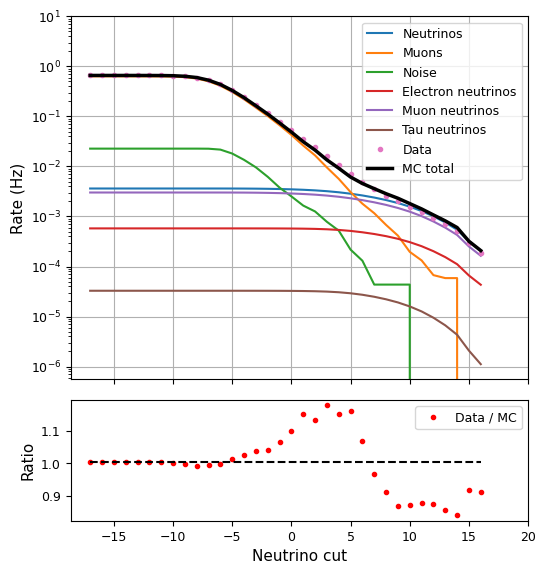

In [ ]:
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.85
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])


axs[0].plot(cuts,neutrino_rates_down,label='Neutrinos',)
axs[0].plot(cuts,muon_rates_down,label='Muons')
axs[0].plot(cuts,noise_rates_down,label='Noise')
axs[0].plot(cuts,electron_neutrino_rates_down,label='Electron neutrinos')
axs[0].plot(cuts,muon_neutrino_rates_down,label='Muon neutrinos')
axs[0].plot(cuts,tau_neutrino_rates_down,label='Tau neutrinos')
axs[0].plot(cuts,RD_rates_down,'.',label='Data',linewidth=2.5)#,linestyle='dashed')
axs[0].plot(cuts,np.array(neutrino_rates_down)+np.array(muon_rates_down)+np.array(noise_rates_down),label='MC total',color='k',linewidth=2.5)
axs[0].set_ylabel('Rate (Hz)')
axs[1].set_xlabel('Neutrino cut')
axs[0].set_yscale('log')
axs[0].set_xlim(right=20)
axs[0].set_ylim(top=10)
axs[0].legend()
axs[0].grid(True)

RD_MC_ratio = RD_rates_down/(np.array(neutrino_rates_down)+np.array(muon_rates_down)+np.array(noise_rates_down))
axs[1].set_ylabel('Ratio')
axs[1].plot(cuts,RD_MC_ratio,'.',color='red',label='Data / MC')
axs[1].hlines(RD_MC_ratio[0],np.min(cuts)-0.02,np.max(cuts)+0.02,color='k',linestyles='dashed')
axs[1].legend()
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/"
fig.savefig(outdir+ 'MC_vs_retro_selection_only_downgoing.png', format='png', bbox_inches='tight')

In [36]:
noise_rates = []
muon_rates = []
neutrino_rates = []
electron_neutrino_rates = []
muon_neutrino_rates = []
tau_neutrino_rates = []
RD_rates = []

cuts = np.linspace(-17,16,34)
for i in range(len(cuts)):
    neutrino_cut = cuts[i]
    pure_selection_MC_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-12,12,-14,14,-16,16)))]
    pure_selection_MC_electron_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-12,12)))]
    pure_selection_MC_muon_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-14,14)))]
    pure_selection_MC_tau_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-16,16)))]
    pure_selection_MC_noise = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-1,1)))]
    pure_selection_MC_muons = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut) & (MC['pid'].isin((-13,13)))]
    pure_selection_RD = RD['event_no'][RD['pid_neutrino_pred_logit']>neutrino_cut]

    muon_rates.append(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
    noise_rates.append(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
    neutrino_rates.append(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
    electron_neutrino_rates.append(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
    muon_neutrino_rates.append(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
    tau_neutrino_rates.append(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))
    RD_rates.append(np.sum(RD['total_osc_weight'][RD['event_no'].isin(pure_selection_RD.to_list())]))

In [37]:
noise_rates_plot = np.array(noise_rates)*0.150
muon_rates_plot = np.array(muon_rates)*1.365
neutrino_rates_plot = np.array(neutrino_rates)*1.336*0.9
electron_neutrino_rates_plot = np.array(electron_neutrino_rates)*1.336*0.9
muon_neutrino_rates_plot = np.array(muon_neutrino_rates)*1.336*0.9
tau_neutrino_rates_plot = np.array(tau_neutrino_rates)*1.336*0.9

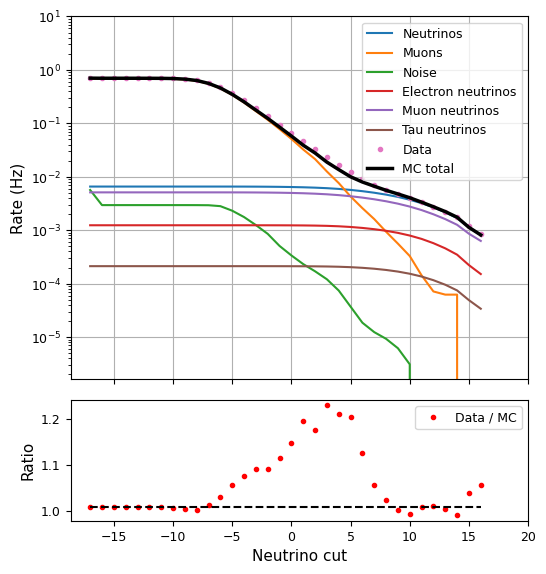

In [40]:


figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.85
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])


axs[0].plot(cuts,neutrino_rates_plot,label='Neutrinos',)
axs[0].plot(cuts,muon_rates_plot,label='Muons')
axs[0].plot(cuts,noise_rates_plot,label='Noise')
axs[0].plot(cuts,electron_neutrino_rates_plot,label='Electron neutrinos')
axs[0].plot(cuts,muon_neutrino_rates_plot,label='Muon neutrinos')
axs[0].plot(cuts,tau_neutrino_rates_plot,label='Tau neutrinos')
axs[0].plot(cuts,RD_rates,'.',label='Data',linewidth=2.5)#,linestyle='dashed')
axs[0].plot(cuts,np.array(neutrino_rates_plot)+np.array(muon_rates_plot)+np.array(noise_rates_plot),label='MC total',color='k',linewidth=2.5)
axs[0].set_ylabel('Rate (Hz)')
axs[1].set_xlabel('Neutrino cut')
axs[0].set_yscale('log')
axs[0].set_xlim(right=20)
axs[0].set_ylim(top=10)
axs[0].legend()
axs[0].grid(True)

RD_MC_ratio = RD_rates/(np.array(neutrino_rates_plot)+np.array(muon_rates_plot)+np.array(noise_rates_plot))
axs[1].set_ylabel('Ratio')
axs[1].plot(cuts,RD_MC_ratio,'.',color='red',label='Data / MC')
axs[1].hlines(RD_MC_ratio[0],np.min(cuts)-0.02,np.max(cuts)+0.02,color='k',linestyles='dashed')
axs[1].legend()
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/"
#fig.savefig(outdir+ 'MC_vs_retro_selection_scaled.png', format='png', bbox_inches='tight')

In [11]:
retro = retro[(retro['event_no'].isin(MC['event_no']))&(retro['L7_oscNext_bool']==1) & (retro['L7_MuonClassifier_FullSky_ProbNu']>0.8)]

In [12]:
neutrino_cut = 12
pure_selection_MC_neutrinos = MC['event_no'][(MC['pid_neutrino_pred_logit']>neutrino_cut)]
pure_selection_RD_neutrinos = RD['event_no'][(RD['pid_neutrino_pred_logit']>neutrino_cut)]
print(len(pure_selection_MC_neutrinos))

9609604


In [13]:
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos)]))
print(np.sum(RD['total_osc_weight'][RD['event_no'].isin(pure_selection_RD_neutrinos)]))

0.0012126414530378871
0.002276948456685147
0.002773715281501204


In [14]:
retro_after_zenith_cut = retro['event_no'][np.cos(retro['zenith_retro'])<0.3]
retro_after_zenith_cut_2 = MC['event_no'][(np.cos(MC['zenith_pred'])<0.3) & (MC['event_no'].isin(retro['event_no'].to_list()))]
our_after_zenith_cut = MC['event_no'][(np.cos(MC['zenith_pred'])<0.3) & (MC['event_no'].isin(pure_selection_MC_neutrinos))]
our_after_zenith_cut_RD = RD['event_no'][(np.cos(RD['zenith_pred'])<0.3) & (RD['event_no'].isin(pure_selection_RD_neutrinos))]


In [15]:
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_cut)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_cut_2)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(our_after_zenith_cut)]))
print(np.sum(RD['total_osc_weight'][RD['event_no'].isin(our_after_zenith_cut_RD)]))

(MC['pid'][MC['event_no'].isin(our_after_zenith_cut)]).value_counts()

0.00089147377712873
0.000953594492579621
0.0019226027705799942
0.0023525719467456805


 14.0    2976340
 16.0    1465391
-14.0    1328246
 12.0    1294086
-12.0     574542
-16.0     552421
 13.0          1
Name: pid, dtype: int64

In [16]:
retro_after_zenith_and_energy_cut = retro['event_no'][(retro['energy_retro'] < 300) & (retro['energy_retro'] > 5) & (retro['event_no'].isin(retro_after_zenith_cut))]
retro_after_zenith_and_energy_cut_2 = MC['event_no'][(MC['energy_pred'] < 300) & (MC['energy_pred'] > 5) & (MC['event_no'].isin(retro_after_zenith_cut_2))]
our_after_zenith_and_energy_cut = MC['event_no'][(MC['energy_pred'] < 300) & (MC['energy_pred'] > 5) & (MC['event_no'].isin(our_after_zenith_cut))]
our_after_zenith_and_energy_cut_RD = RD['event_no'][(RD['energy_pred'] < 300) & (RD['energy_pred'] > 5) & (RD['event_no'].isin(our_after_zenith_cut_RD))]

In [17]:
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_and_energy_cut)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_and_energy_cut_2)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(our_after_zenith_and_energy_cut)]))
print(np.sum(RD['total_osc_weight'][RD['event_no'].isin(our_after_zenith_and_energy_cut_RD)]))
print((MC['pid'][MC['event_no'].isin(our_after_zenith_and_energy_cut)]).value_counts())

0.0008174833943349918
0.0009159926787122145
0.0017325805651675664
0.002054697804781653
 14.0    2643723
 16.0    1251064
-14.0    1193857
 12.0    1116847
-12.0     498258
-16.0     473270
 13.0          1
Name: pid, dtype: int64


In [18]:
def calc_rho_36(x,y) :
    '''
    Radial distance from string 36 (approximately central within DeepCore)
    '''
    return np.sqrt( (x-46.29) ** 2 + (y+34.88) ** 2 )

In [19]:
MC['rho'] = calc_rho_36(MC['position_x_pred'].values,MC['position_y_pred'].values)
RD['rho'] = calc_rho_36(RD['position_x_pred'].values,RD['position_y_pred'].values)
retro['rho'] = calc_rho_36(retro['position_x_retro'].values,retro['position_y_retro'].values)

In [20]:
retro_after_zenith_and_energy_and_containment_cut = retro['event_no'][(retro['rho'] < 300) & (retro['position_z_retro'] > -500) & (retro['position_z_retro'] < -200) & (retro['event_no'].isin(retro_after_zenith_and_energy_cut))]
retro_after_zenith_and_energy_and_containment_cut_2 = MC['event_no'][(MC['rho'] < 300) & (MC['position_z_pred'] > -500) & (MC['position_z_pred'] < -200) & (MC['event_no'].isin(retro_after_zenith_and_energy_cut_2))]
our_after_zenith_and_energy_and_containment_cut = MC['event_no'][(MC['rho'] < 300) & (MC['position_z_pred'] > -500) & (MC['position_z_pred'] < -200) & (MC['event_no'].isin(our_after_zenith_and_energy_cut))]
our_after_zenith_and_energy_and_containment_cut_RD = RD['event_no'][(RD['rho'] < 300) & (RD['position_z_pred'] > -500) & (RD['position_z_pred'] < -200) & (RD['event_no'].isin(our_after_zenith_and_energy_cut_RD))]

In [21]:
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_and_energy_and_containment_cut)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_and_energy_and_containment_cut_2)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut)]))
print(np.sum(RD['total_osc_weight'][RD['event_no'].isin(our_after_zenith_and_energy_and_containment_cut_RD)]))
print((MC['pid'][MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut)]).value_counts())
retro_final_1 = np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_and_energy_and_containment_cut)])
retro_final_2 = np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro_after_zenith_and_energy_and_containment_cut_2)])
our_final = np.sum(MC['total_osc_weight'][MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut)])

0.0007936852227851161
0.0008867743153841535
0.0013792007547197471
0.0015993306324387727
 14.0    2049944
 16.0     993049
-14.0     918540
 12.0     907234
-12.0     405819
-16.0     375010
 13.0          1
Name: pid, dtype: int64


In [22]:
print(np.sum(MC['total_osc_weight'][(MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut))&(MC['pid'].isin((-12,12,-14,14,-16,16)))]))
print(np.sum(MC['total_osc_weight'][(MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut))&(MC['pid'].isin((-13,13)))]))
our_final_neutrinos = np.sum(MC['total_osc_weight'][(MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut))&(MC['pid'].isin((-12,12,-14,14,-16,16)))])
our_final_muons = np.sum(MC['total_osc_weight'][(MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut))&(MC['pid'].isin((-13,13)))])

0.0013725027028395449
6.698051880201958e-06


In [23]:
print(our_final)
print(our_final_neutrinos)
print(our_final_muons)
print(our_final_neutrinos/our_final*100)
print(our_final_muons/our_final*100)

0.0013792007547197471
0.0013725027028395449
6.698051880201958e-06
99.5143526526301
0.48564734736989024


In [24]:
print(our_final/retro_final_1*100-100)
print(our_final/retro_final_2*100-100)

73.77175675263322
55.53007465290344


In [25]:
neutrino_cut = 12
pure_selection_MC_neutrinos_for_plot = MC['event_no'][((MC['pid_neutrino_pred_logit']>neutrino_cut)) & (MC['pid'].isin((-12,12,-14,14,-16,16)))]

In [26]:
same = pd.merge(pure_selection_MC_neutrinos_for_plot,retro,on='event_no',how='inner')
only_retro_event_nos = retro['event_no'][~retro['event_no'].isin(same['event_no'])]
only_our_selection_event_nos = MC['event_no'][(~MC['event_no'].isin(same['event_no']))&(MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list()))]

In [27]:
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'])]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())]))

0.0012126414530378871
0.002224562395705728
0.0003292647099830056
0.0013411856526508485
0.0008833767430548811


[-17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5 -13.  -12.5]


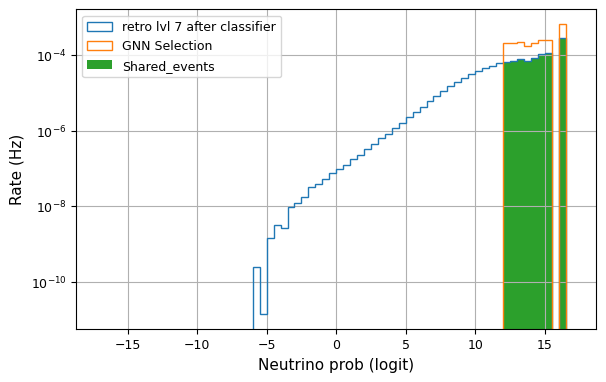

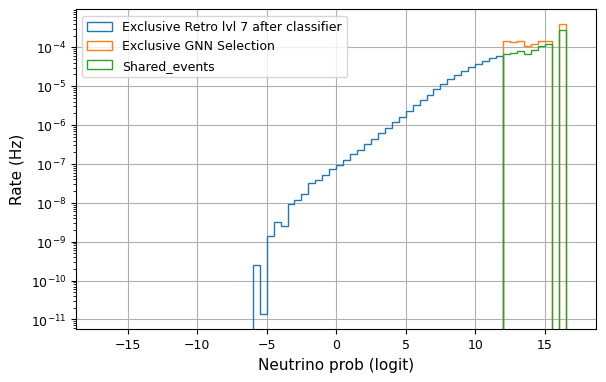

In [28]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-17,17,69)
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(retro['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared_events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino prob (logit)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_neutrino_prob_logit.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-17,17,69)
print(bins[:10])
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(only_retro_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared_events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino prob (logit)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_neutrino_prob_logit_exclusive.png', format='png', bbox_inches='tight')

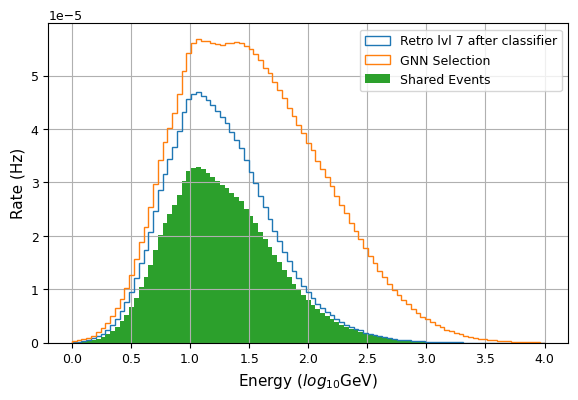

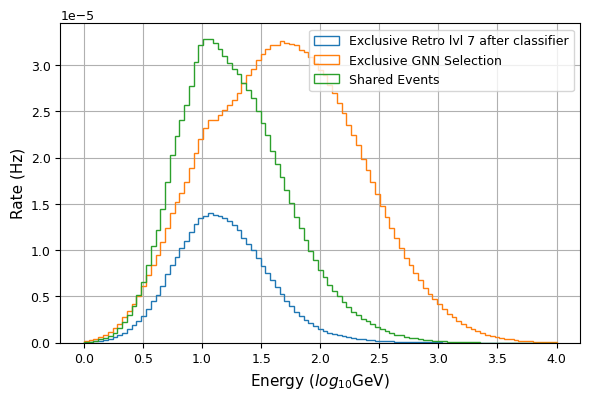

In [29]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,4,100)
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(retro['event_no'].to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(same['event_no'].to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel(r'Energy ($log_{10}$GeV)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_energy.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,4,100)
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(only_retro_event_nos)]),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(only_our_selection_event_nos.to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(same['event_no'].to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel(r'Energy ($log_{10}$GeV)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_energy_exclusive.png', format='png', bbox_inches='tight')

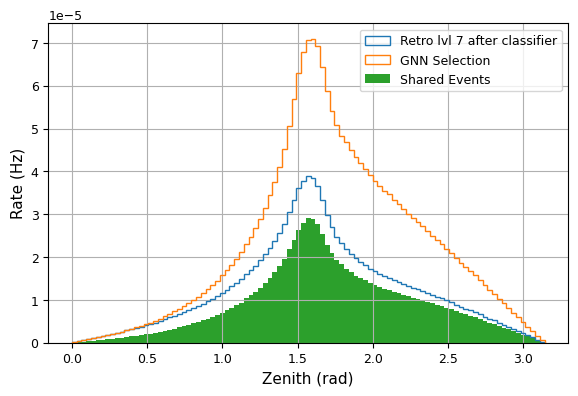

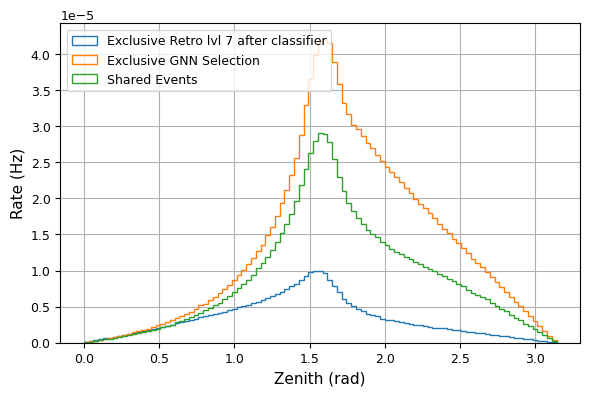

In [30]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['zenith'][MC['event_no'].isin(retro['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Zenith (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_zenith.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['zenith'][MC['event_no'].isin(only_retro_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Zenith (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_zenith_exclusive.png', format='png', bbox_inches='tight')

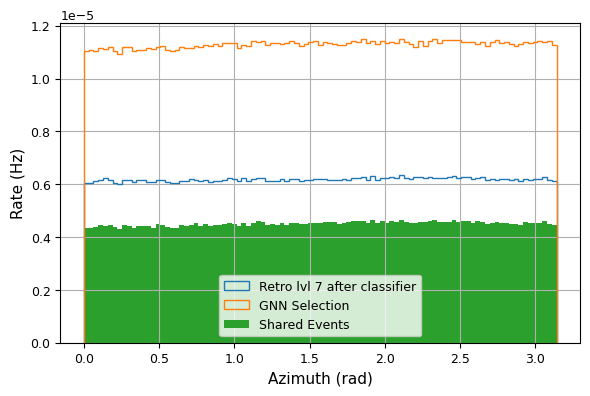

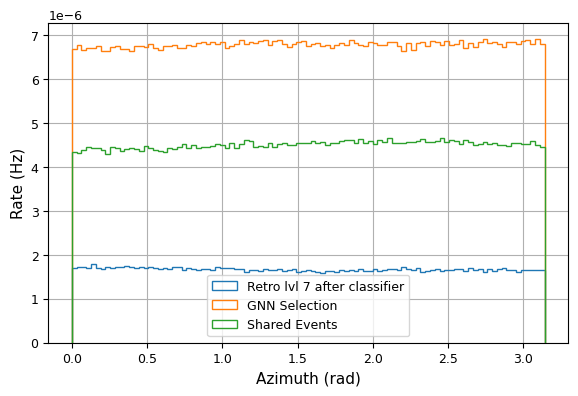

In [31]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['azimuth'][MC['event_no'].isin(retro['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Azimuth (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_azimuth.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['azimuth'][MC['event_no'].isin(only_retro_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Azimuth (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_azimuth_exclusive.png', format='png', bbox_inches='tight')


#outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/"
#fig.savefig(outdir+ 'MC_vs_retro_selection_all_long.png', format='png', bbox_inches='tight')

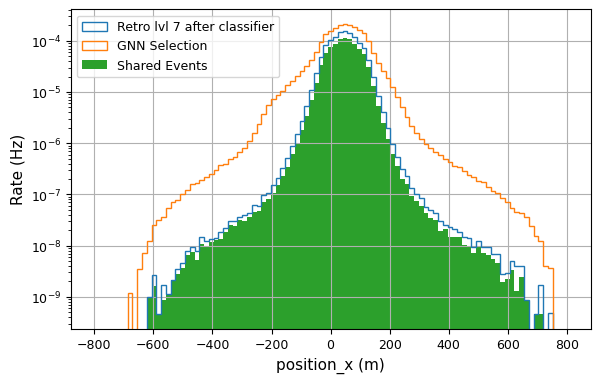

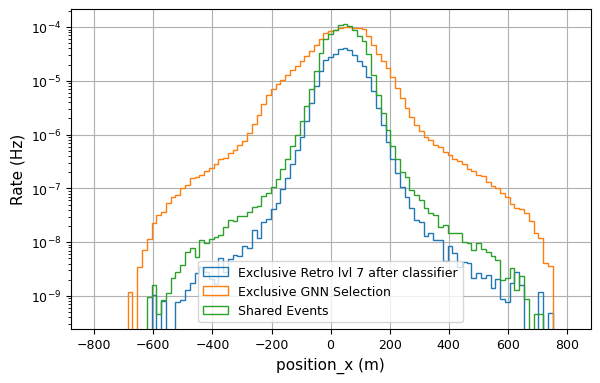

In [32]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(retro['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_x (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posx.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(only_retro_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_x (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posx_exclusive.png', format='png', bbox_inches='tight')

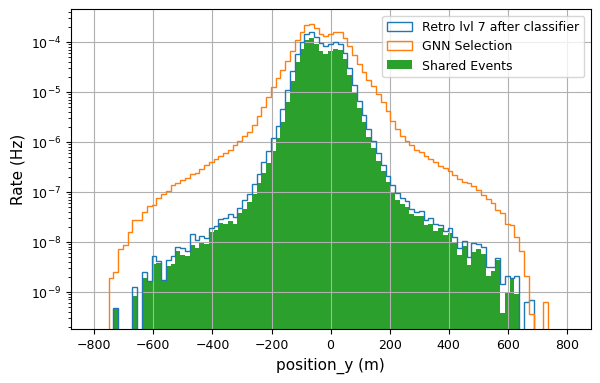

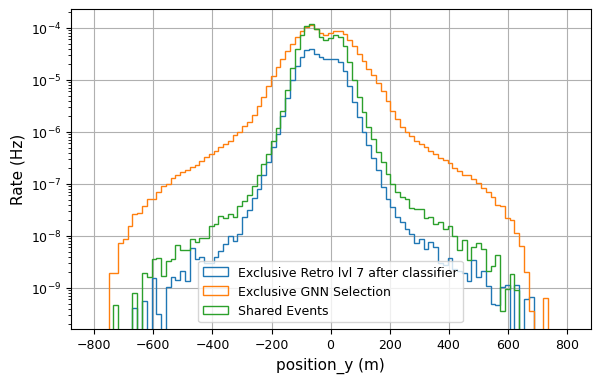

In [33]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(retro['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_y (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posy.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(only_retro_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_y (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posy_exclusive.png', format='png', bbox_inches='tight')

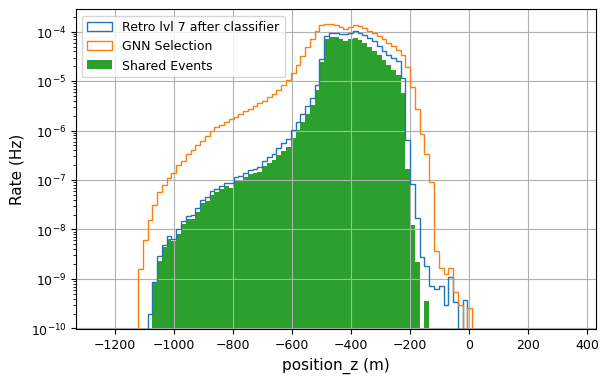

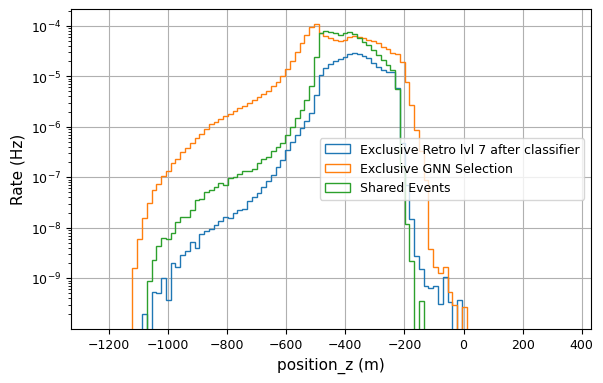

In [34]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-1250,350,100)
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(retro['event_no'].to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(same['event_no'].to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_z (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posz.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-1250,350,100)
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(only_retro_event_nos.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(same['event_no'].to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_z (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posz_exclusive.png', format='png', bbox_inches='tight')

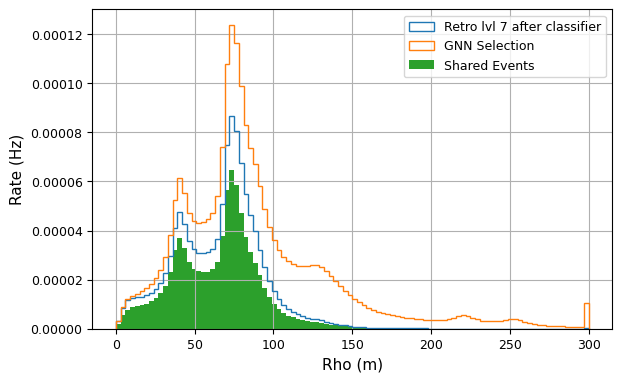

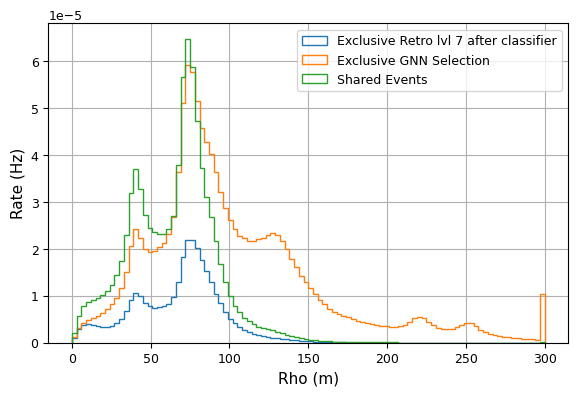

In [35]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-0,300,101)
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(retro['event_no'].to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(same['event_no'].to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='stepfilled')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Rho (m)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=101)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_rho.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-0,300,101)
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(only_retro_event_nos.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(same['event_no'].to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Rho (m)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=101)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_after_their_last_classifier/"
fig.savefig(outdir+ 'MC_vs_retro_selection_rho_exclusive.png', format='png', bbox_inches='tight')

In [149]:
our_after_zenith_and_energy_and_containment_cut

2                  2.0
4                  4.0
5                  5.0
12                12.0
32                32.0
               ...    
37234976    38884961.0
37234989    38884975.0
37235002    38884988.0
37235008    38884994.0
37235633    38885629.0
Name: event_no, Length: 5649597, dtype: float64

In [150]:
neutrino_cut = 12
pure_selection_MC_neutrinos_for_plot = MC['event_no'][(MC['event_no'].isin(our_after_zenith_and_energy_and_containment_cut)) & (MC['pid'].isin((-12,12,-14,14,-16,16)))]
pure_selection_MC_neutrinos_retro = MC['event_no'][(MC['event_no'].isin(retro_after_zenith_and_energy_and_containment_cut)) & (MC['pid'].isin((-12,12,-14,14,-16,16)))]

In [151]:
same = pd.merge(pure_selection_MC_neutrinos_for_plot,pure_selection_MC_neutrinos_retro,on='event_no',how='inner')
only_retro_event_nos = retro['event_no'][(~retro['event_no'].isin(same['event_no'])) & (retro['event_no'].isin(pure_selection_MC_neutrinos_retro))]
only_our_selection_event_nos = MC['event_no'][(~MC['event_no'].isin(same['event_no']))&(MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list()))]

In [152]:
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos)]))
print(np.sum(MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())]))

0.0007936852227851161
0.0013725027028395449
0.0002157327091675844
0.0007945501892220137
0.000577952513617532


[-17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5 -13.  -12.5]


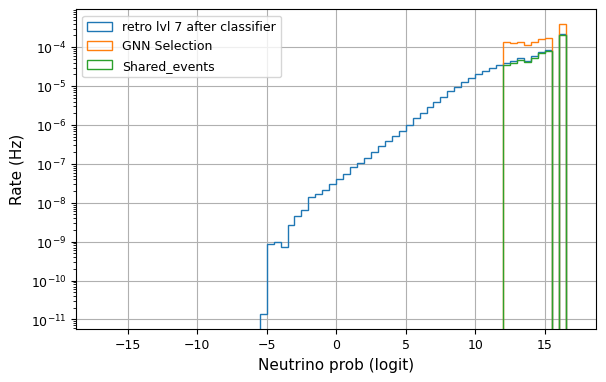

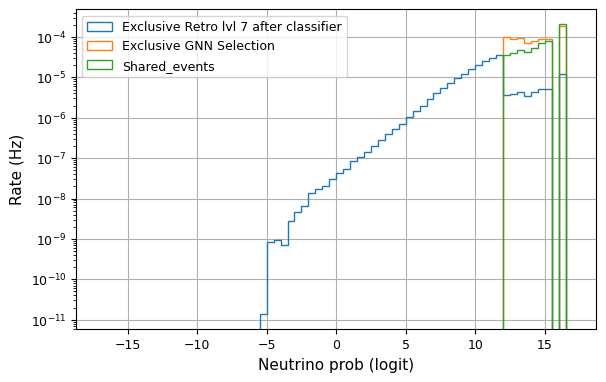

In [153]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-17,17,69)
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared_events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino prob (logit)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_neutrino_prob_logit.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-17,17,69)
print(bins[:10])
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(only_retro_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['pid_neutrino_pred_logit'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared_events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino prob (logit)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_neutrino_prob_logit_exclusive.png', format='png', bbox_inches='tight')

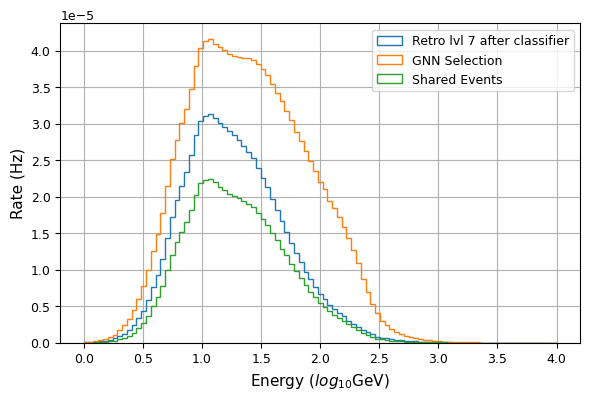

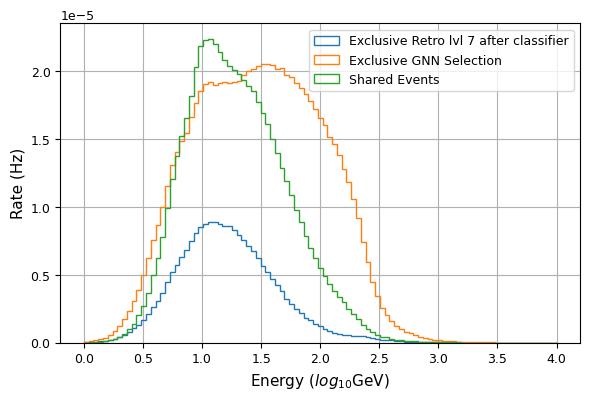

In [154]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,4,100)
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(same['event_no'].to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel(r'Energy ($log_{10}$GeV)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_energy.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,4,100)
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(only_retro_event_nos)]),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(only_our_selection_event_nos.to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(MC['energy'][MC['event_no'].isin(same['event_no'].to_list())]),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel(r'Energy ($log_{10}$GeV)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_energy_exclusive.png', format='png', bbox_inches='tight')

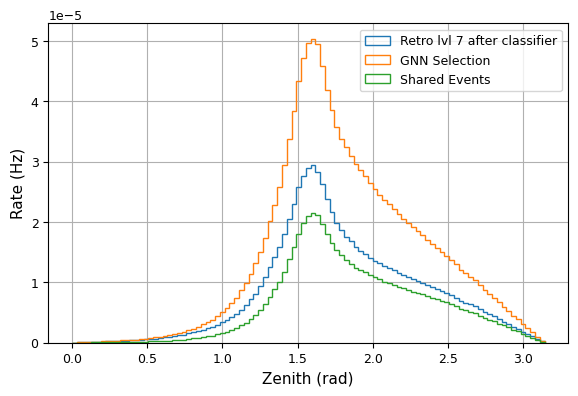

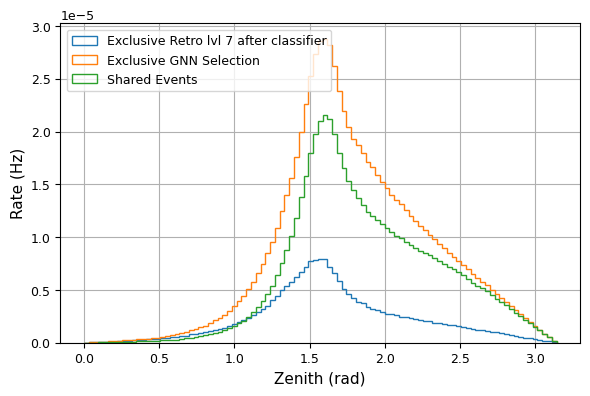

In [155]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['zenith'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Zenith (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_zenith.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['zenith'][MC['event_no'].isin(only_retro_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['zenith'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Zenith (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_zenith_exclusive.png', format='png', bbox_inches='tight')

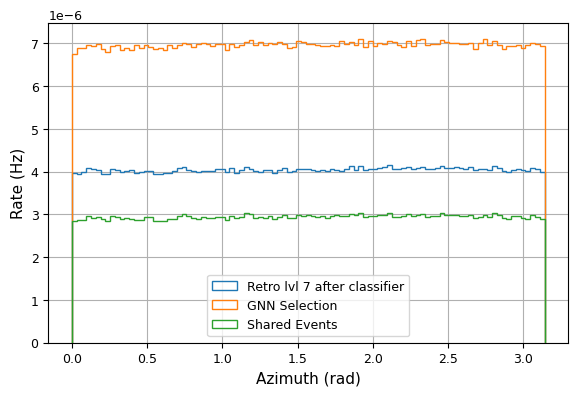

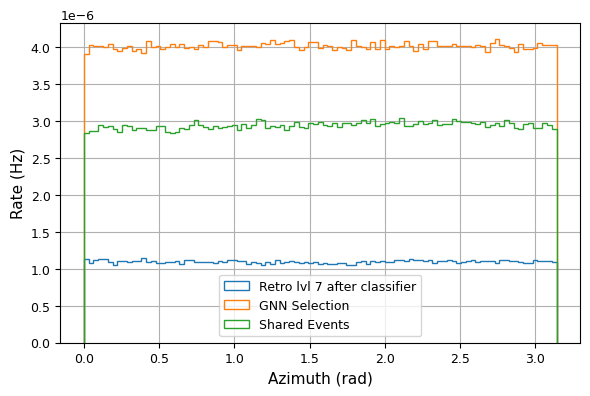

In [156]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['azimuth'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Azimuth (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_azimuth.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(MC['azimuth'][MC['event_no'].isin(only_retro_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(MC['azimuth'][MC['event_no'].isin(same['event_no'].to_list())],weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Azimuth (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_azimuth_exclusive.png', format='png', bbox_inches='tight')


#outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/"
#fig.savefig(outdir+ 'MC_vs_retro_selection_all_long.png', format='png', bbox_inches='tight')

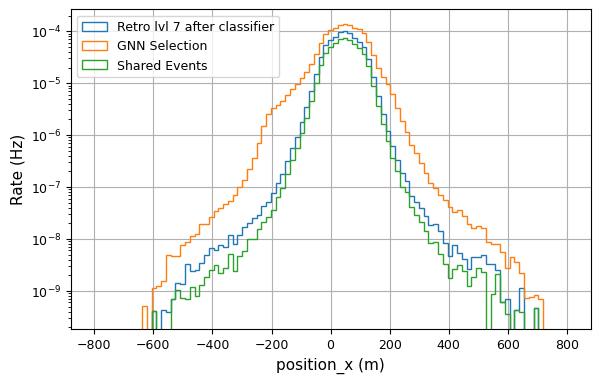

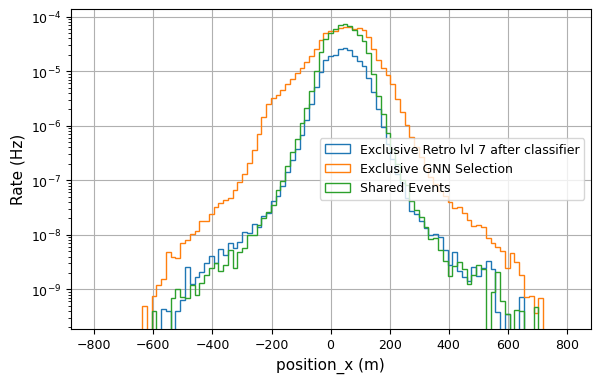

In [157]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_x (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posx.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(only_retro_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_x'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_x (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posx_exclusive.png', format='png', bbox_inches='tight')

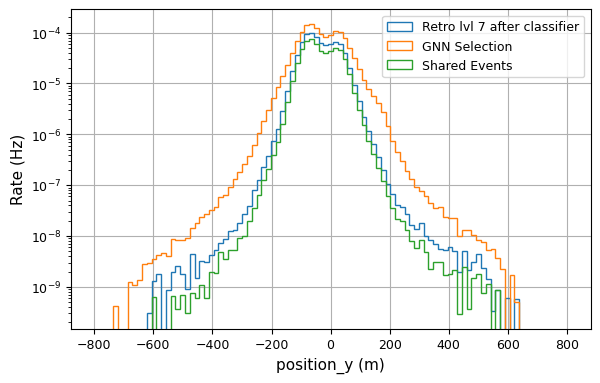

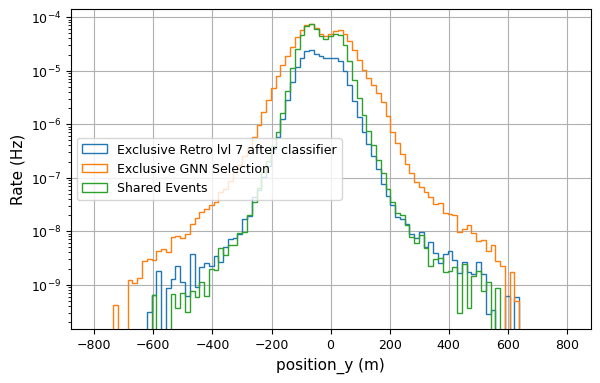

In [158]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_y (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posy.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(only_retro_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_y'][MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_y (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posy_exclusive.png', format='png', bbox_inches='tight')

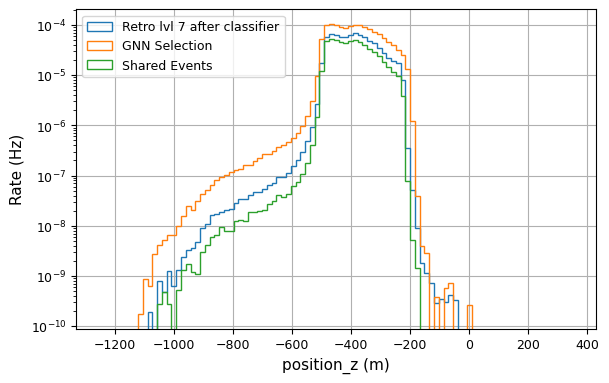

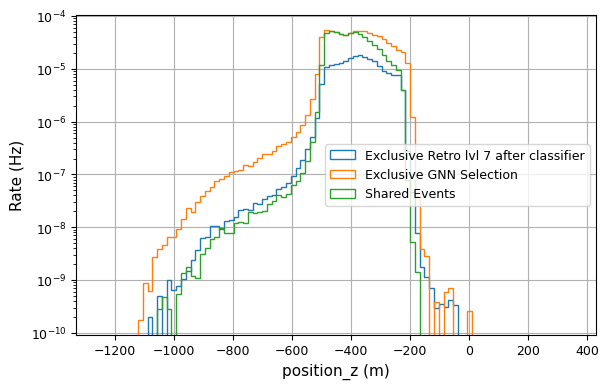

In [159]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-1250,350,100)
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(same['event_no'].to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_z (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posz.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-1250,350,100)
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(only_retro_event_nos.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['position_z'][MC['event_no'].isin(same['event_no'].to_list())],-1200,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_z (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posz_exclusive.png', format='png', bbox_inches='tight')

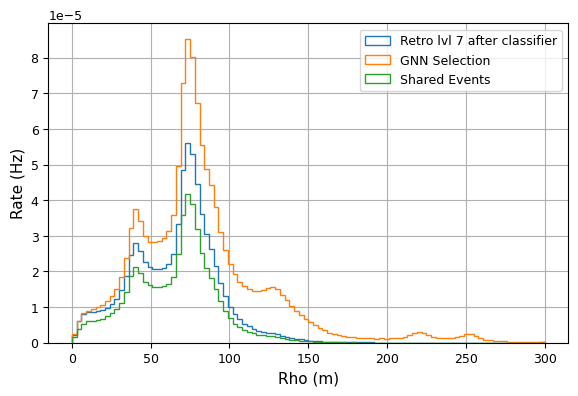

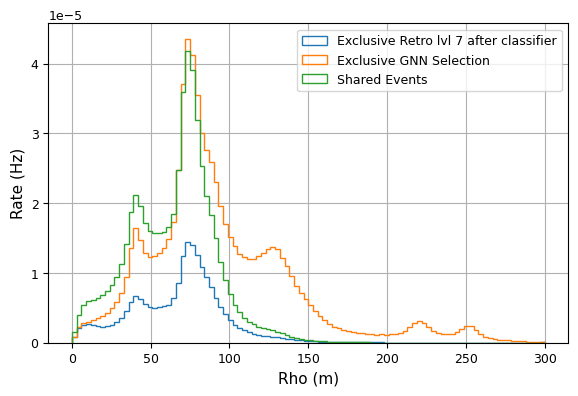

In [160]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-0,300,101)
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_retro.to_list())],label='Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(pure_selection_MC_neutrinos_for_plot.to_list())],label='GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(same['event_no'].to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Rho (m)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=101)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_rho.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-0,300,101)
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(only_retro_event_nos.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7 after classifier',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive GNN Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(MC['rho'][MC['event_no'].isin(same['event_no'].to_list())],0,300),weights=MC['total_osc_weight'][MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Rho (m)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=101)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/MC_selection_lvls_and_vs_retro/Distribution_almost_final_selection/"
fig.savefig(outdir+ 'MC_vs_retro_selection_rho_exclusive.png', format='png', bbox_inches='tight')